In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
import matplotlib.pyplot as plt
from math import ceil
import os

In [2]:
NL_c = 0.01
NL_t = 0.4
NL_nu= 0.3034496449165134
NL_L = 1.8

alfx = np.tan(np.pi*NL_nu)
betx = NL_L/np.sin(2.0*np.pi*NL_nu)
print(betx,alfx)

emitx = 6.066503e-6

1.9065054393933862 1.4082261727304293


In [3]:
beam, lattice = impact.readInputFile('test_IOTA.in')
lattice = impact.clearLattice(lattice)

ke = beam.kinetic_energy
mass = beam.mass
freq = beam.frequency

beam.nCore_y = 2
beam.nCore_z = 2
beam.n_particles = 40000
beam.current = 0.0

reading ImpactZ input file (test_IOTA.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


# get emittance vs H

In [4]:
def getTwiss(H0):
    beam.distribution.mode = 'twiss'
    beam.distribution.distribution_type = 'IOTA_Waterbag'
    beam.distribution.emitx = H0
    beam.distribution.NL_t = NL_t
    beam.distribution.NL_c = NL_c
    beam.distribution.betx = betx
    beam.distribution.alfx = alfx
    beam.distribution.betz = 0.0
    beam.distribution.alfz = 0.0
    beam.distribution.emitz = 0.0

    
    loop = impact.getElem('loop')
    loop.turns = 1

    write_pData = impact.getElem('write_raw_ptcl')
    write_pData.turn = 1
    write_pData.file_id = 7777
    write_pData.format_id = 2
    
    impact.writeInputFile(beam,[loop, write_pData]);
    impact.run(beam,order=1)
    
    pData = impact.readParticleData(7777,ke,mass,freq,2)
    Twiss = impact.getTwiss_from_pData(pData)
    
    return Twiss[:6]

In [5]:
data = []
H0 = []
for i in range(100):
    H0.append(1.0e-7*(i+1))
    data.append(getTwiss(H0[-1]))

/home/kilean/WorkSpace/pImpactR/pImpactR/impactIO.py:1684: RuntimeWarning: invalid value encountered in double_scalars
  betz = varx/emitz
/home/kilean/WorkSpace/pImpactR/pImpactR/impactIO.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  alfz = np.sqrt(varpx/emitz*betz-1)


In [6]:
data = np.array(data)
H0 = np.array(H0)

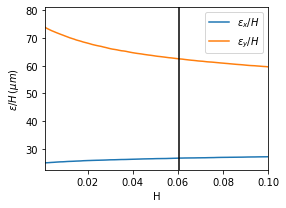

In [24]:
plt.figure(figsize=(4,3))
plt.plot(H0*1.0e4, data[:,2]/H0*100);
plt.plot(H0*1.0e4, data[:,5]/H0*100);
minv = np.min([data[:,2]/H0,data[:,5]/H0])*0.9*100
maxv = np.max([data[:,2]/H0,data[:,5]/H0])*1.1*100
plt.plot([emitx*1.0e4,emitx*1.0e4],[minv,maxv],'k-');
plt.xlim(H0[0]*1.0e4,H0[-1]*1.0e4);
plt.ylim(minv,maxv);
plt.xlabel('H')
plt.ylabel(r'$\epsilon/H\, (\mu m)$')
plt.legend([r'$\epsilon_x/H$',r'$\epsilon_y/H$'])

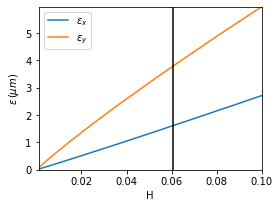

In [19]:
plt.figure(figsize=(4,3))
plt.plot(H0*1.0e4, data[:,2]*1.0e6);
plt.plot(H0*1.0e4, data[:,5]*1.0e6);
minv = 0 #np.min([data[:,2]*1.0e6,data[:,5]*1.0e6])*0.5
maxv = np.max([data[:,2]*1.0e6,data[:,5]*1.0e6])*1.0
plt.plot([emitx*1.0e4,emitx*1.0e4],[minv,maxv],'k-');
plt.xlim(H0[0]*1.0e4,H0[-1]*1.0e4);
plt.ylim(minv,maxv);
plt.xlabel('H')
plt.ylabel(r'$\epsilon\, (\mu m)$')
plt.legend([r'$\epsilon_x$',r'$\epsilon_y$'])

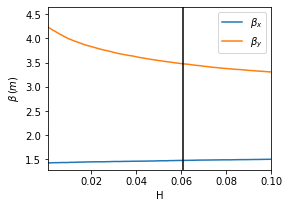

In [20]:
plt.figure(figsize=(4,3))
plt.plot(H0*1.0e4, data[:,0]);
plt.plot(H0*1.0e4, data[:,3]);
minv = np.min([data[:,0],data[:,3]])*0.9
maxv = np.max([data[:,0],data[:,3]])*1.1
plt.plot([emitx*1.0e4,emitx*1.0e4],[minv,maxv],'k-');
plt.xlim(H0[0]*1.0e4,H0[-1]*1.0e4);
plt.ylim(minv,maxv);
plt.xlabel('H')
plt.ylabel(r'$\beta\, (m)$')
plt.legend([r'$\beta_x$',r'$\beta_y$'])

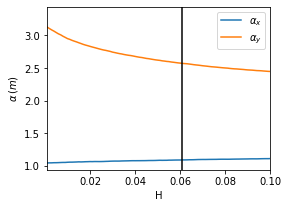

In [21]:
plt.figure(figsize=(4,3))
plt.plot(H0*1.0e4, data[:,1]);
plt.plot(H0*1.0e4, data[:,4]);
minv = np.min([data[:,1],data[:,4]])*0.9
maxv = np.max([data[:,1],data[:,4]])*1.1
plt.plot([emitx*1.0e4,emitx*1.0e4],[minv,maxv],'k-');
plt.xlim(H0[0]*1.0e4,H0[-1]*1.0e4);
plt.ylim(minv,maxv);
plt.xlabel('H')
plt.ylabel(r'$\alpha\, (m)$')
plt.legend([r'$\alpha_x$',r'$\alpha_y$'])